In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
import matplotlib as mpl
mpl.style.use('seaborn')

In [14]:
df_dict = pd.read_excel('Data Dictionary.xlsx')
df_dict

,Variable Name,Description,Unnamed: 2
0,UniqueID,Identifier for customers,NaN
1,loan_default,Payment default in the first EMI on due date,NaN
2,disbursed_amount,Amount of Loan disbursed,NaN
3,asset_cost,Cost of the Asset,NaN
4,ltv,Loan to Value of the asset,NaN
5,branch_id,Branch where the loan was disbursed,NaN
6,supplier_id,Vehicle Dealer where the loan was disbursed,NaN
7,manufacturer_id,"Vehicle manufacturer(Hero, Honda, TVS etc.)",NaN
8,Current_pincode,Current pincode of the customer,NaN
9,Date.of.Birth,Date of birth of the customer,NaN


In [15]:
train = pd.read_csv('train.csv')
train.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [4]:
train.dtypes

UNIQUEID                                 int64
DISBURSED_AMOUNT                         int64
ASSET_COST                               int64
LTV                                    float64
BRANCH_ID                                int64
SUPPLIER_ID                              int64
MANUFACTURER_ID                          int64
CURRENT_PINCODE_ID                       int64
DATE_OF_BIRTH                           object
EMPLOYMENT_TYPE                         object
DISBURSAL_DATE                          object
STATE_ID                                 int64
EMPLOYEE_CODE_ID                         int64
MOBILENO_AVL_FLAG                        int64
AADHAR_FLAG                              int64
PAN_FLAG                                 int64
VOTERID_FLAG                             int64
DRIVING_FLAG                             int64
PASSPORT_FLAG                            int64
PERFORM_CNS_SCORE                        int64
PERFORM_CNS_SCORE_DESCRIPTION           object
PRI_NO_OF_ACC

In [5]:
train.describe()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID,...,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


# Formatting and casting datatypes:
<br>

DATE_OF_BIRTH
+ convert to datetime
+ create age column out of it

DISBURSAL_DATE
+ convert to datetime
+ get day of week
+ get month of year


AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH	
+ convert to number


In [6]:
import re
def convert(df, col):
    df[col] = [[re.sub('[a-z]', '', y) for y in x] for x in df[col].str.split(' ')]
    df[col] = df[col].apply(lambda x: (int(x[0]) * 12) + int(x[1]))
    return df[col]

In [7]:
train['AVERAGE_ACCT_AGE'] = convert(train, 'AVERAGE_ACCT_AGE')
train['CREDIT_HISTORY_LENGTH'] = convert(train, 'CREDIT_HISTORY_LENGTH')

In [8]:
train['DATE_OF_BIRTH'] = pd.to_datetime(train['DATE_OF_BIRTH'], format='%d-%m-%Y')
now = dt.now()
train['AGE'] = [round((now - x).days / 352) for x in train['DATE_OF_BIRTH']]

In [9]:
train['DISBURSAL_DATE'] = pd.to_datetime(train['DISBURSAL_DATE'], format='%d-%m-%Y')

In [10]:
train['DAY'] = train['DISBURSAL_DATE'].dt.dayofweek

# Exploratory analysis with visualisations
<br>

**EMPLOYMENT_TYPE**
+ ~check it's distribution and if defaulting is impacted by it~

**AGE**
+ ~create bins~
+ ~check if there is any impact on default~

**CREDIT_HISTORY_LENGTH**
+ ~check its impact on defaults (hist plot)~
+ ~see the default rates amongst people with/without credit history~

**BRANCH_ID, SUPPLIER_ID, MANUFACTURER_ID, EMPLOYEE_CODE_ID**
+ ~check distribution and see if there is any outlier~

**DAY**
+ ~check days/month frequency and see correlation with loan defaults~


<AxesSubplot:>

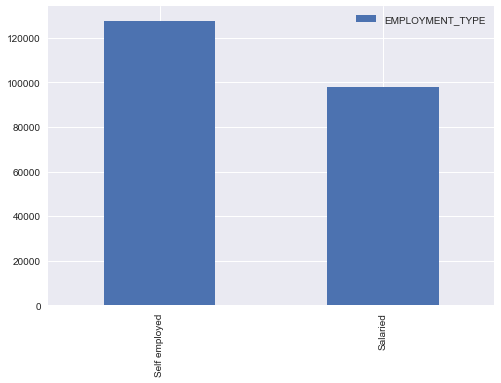

In [11]:
train['EMPLOYMENT_TYPE'].value_counts().to_frame().plot(kind='bar')

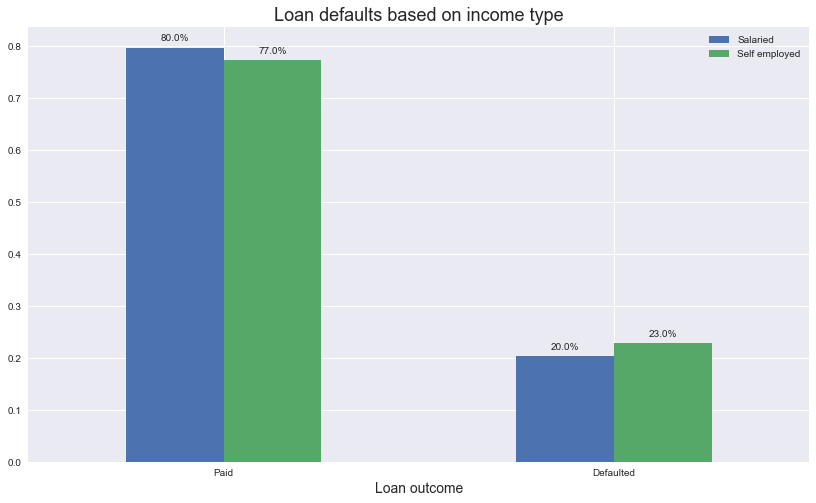

In [12]:
employment_group = train[['EMPLOYMENT_TYPE', 'LOAN_DEFAULT']]
employment_group = employment_group.groupby('EMPLOYMENT_TYPE')['LOAN_DEFAULT'].value_counts(normalize=True).to_frame()
labels = ['Salaried', 'Self employed']
splot = employment_group.unstack(0).plot(kind='bar', figsize=(14,8))
for p in splot.patches:
    splot.annotate(format(round(p.get_height(), 2) * 100)+"%",
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(labels)
tick_labels = ['Paid', 'Defaulted']
plt.xticks(employment_group.unstack(0).index,tick_labels, rotation=0)
plt.xlabel('Loan outcome', size=14)
plt.title('Loan defaults based on income type', size=18)
plt.show()

Self employed applicants seem to be relatively more likely to default on a loan then salaried applicants, although the differences are not extremely significant

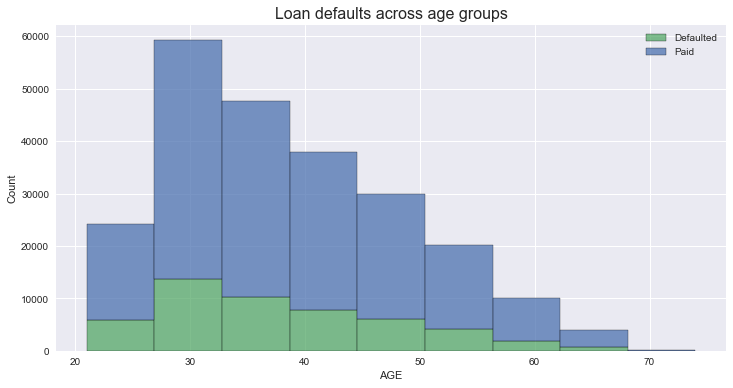

In [13]:
bins = np.linspace(train['AGE'].min(), train['AGE'].max(), 10)
plt.figure(figsize=(12, 6))
labels = ['Defaulted','Paid']
sns.histplot(train, x='AGE', hue='LOAN_DEFAULT', bins=bins, multiple='stack')
plt.legend(labels)
plt.title('Loan defaults across age groups', size=16)
plt.show()


In [14]:
train[['AGE', 'LOAN_DEFAULT']].corr()

,AGE,LOAN_DEFAULT
AGE,1.000000,-0.036027
LOAN_DEFAULT,-0.036027,1.000000


Age does not seem to impact the overall likelihood of defaulting, the numbers across all age groups show consistency in their distribution.

### Credit history vs defaults

<AxesSubplot:ylabel='Frequency'>

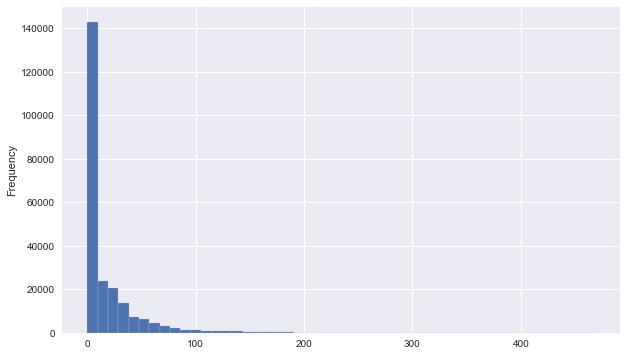

In [15]:
bins = np.linspace(train['CREDIT_HISTORY_LENGTH'].min(), train['CREDIT_HISTORY_LENGTH'].max(), 50)
train['CREDIT_HISTORY_LENGTH'].plot(kind='hist', bins=bins, figsize=(10,6), edgecolor='silver')

There seem to be a large number of applicants with 0 months credit history, whom I will consider as first time applicants
<br>


Below I am separating the applicants with and without credit history and see the distribution of loan defaults

In [16]:
no_credit_hist = train.loc[train['CREDIT_HISTORY_LENGTH'] == 0]
no_credit_hist['LOAN_DEFAULT'].value_counts(normalize=True)

0    0.76855
1    0.23145
Name: LOAN_DEFAULT, dtype: float64

In [17]:
credit_hist = train.loc[train['CREDIT_HISTORY_LENGTH'] > 0]
credit_hist['LOAN_DEFAULT'].value_counts(normalize=True)

0    0.797951
1    0.202049
Name: LOAN_DEFAULT, dtype: float64

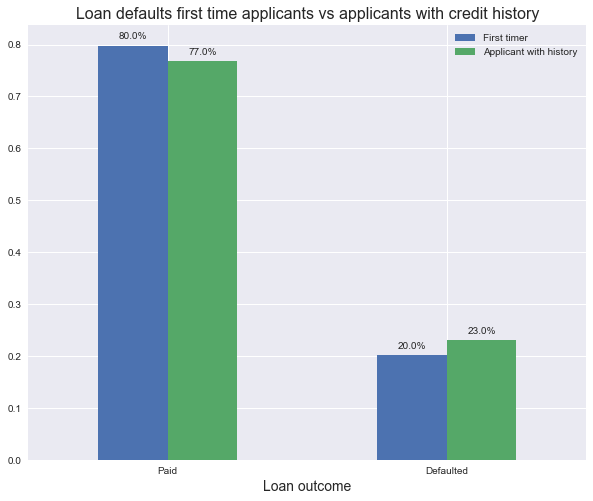

In [18]:
df = pd.DataFrame(list(zip(credit_hist['LOAN_DEFAULT'].value_counts(normalize=True), no_credit_hist['LOAN_DEFAULT'].value_counts(normalize=True))), columns=['NO HIST', 'HIST'])
splot = df.plot(kind='bar', figsize=(10,8))
for p in splot.patches:
    splot.annotate(format(round(p.get_height(), 2) * 100)+"%",
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
tick_labels = ['Paid', 'Defaulted']
leg_labels = ['First timer', 'Applicant with history']
plt.xticks(df.index, tick_labels, rotation=0)
plt.legend(leg_labels)
plt.xlabel('Loan outcome', size=14)
plt.title('Loan defaults first time applicants vs applicants with credit history', size=16)
plt.show()

First time applicants seem to default on their loans relatively less than people with existing credit history

In [19]:
id_list = train[['BRANCH_ID', 'SUPPLIER_ID', 'MANUFACTURER_ID', 'EMPLOYEE_CODE_ID', 'LOAN_DEFAULT']]

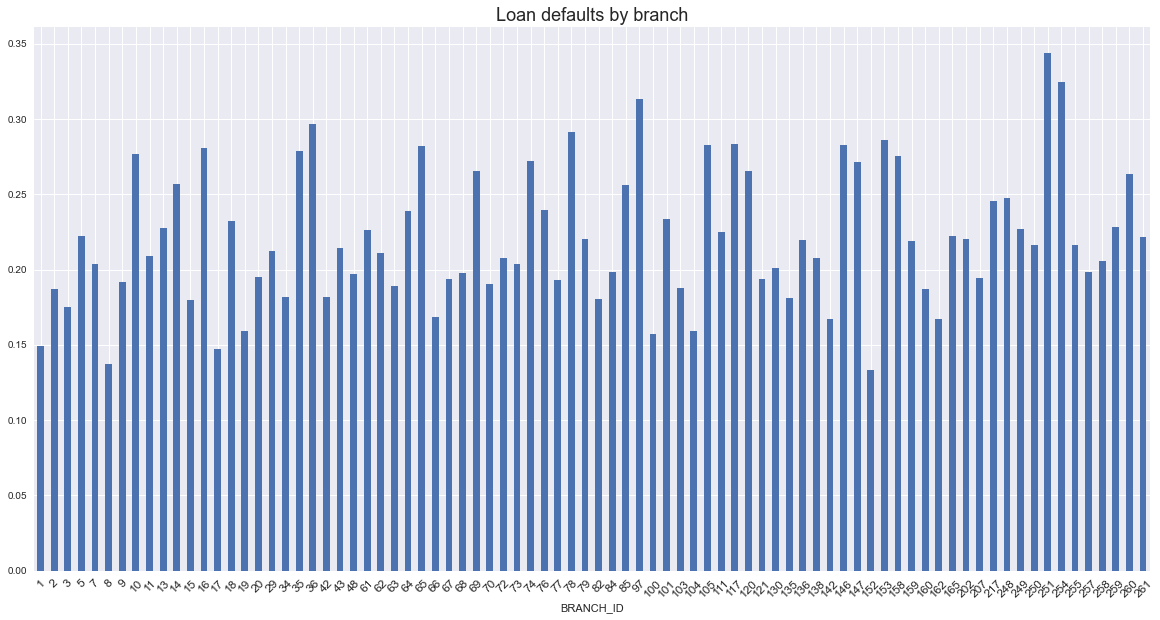

In [20]:
branch  = id_list.groupby(['BRANCH_ID'])['LOAN_DEFAULT'].value_counts(normalize=True).to_frame()
branch.unstack(1)['LOAN_DEFAULT'][1].plot(kind='bar', figsize=(20,10))
plt.xticks(rotation=45, size=12)
plt.title('Loan defaults by branch', size=18)
plt.show()


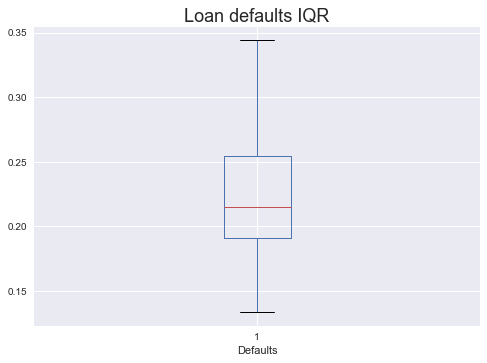

In [21]:
branch.unstack(1)['LOAN_DEFAULT'][1].plot(kind='box')
plt.title('Loan defaults IQR', size=18)
plt.xlabel('Defaults')
plt.show()

In [22]:
branch.unstack(1)['LOAN_DEFAULT'][1][branch.unstack(1)['LOAN_DEFAULT'][1] == branch.unstack(1)['LOAN_DEFAULT'][1].max()]

BRANCH_ID
251    0.343913
Name: 1, dtype: float64

In [23]:
branch.unstack(1)['LOAN_DEFAULT'][1][branch.unstack(1)['LOAN_DEFAULT'][1] == branch.unstack(1)['LOAN_DEFAULT'][1].min()]

BRANCH_ID
152    0.133387
Name: 1, dtype: float64

Loan defaults by Branch ID has not outliers, so no fraudulent behaviour is present that could potentially skew the models. 
<br>

However, there seem to be significant differences between the branches in terms of the likelihood of applicants' default rates:
<br>

At **branch 152** the default rate is a mere **13.33%** whereas at **branch 251** is **34.39%**, more than the 3rd of their applicants default on their loans.

#### Below I will look at the loan defaults by dealership and see if there are any outliers or unusual behavious on the part of the dealerships

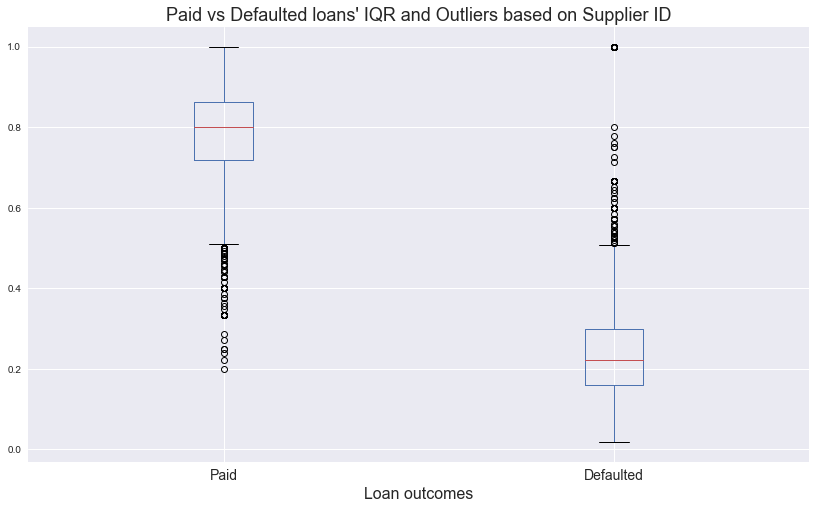

In [24]:
supplier = id_list.groupby(['SUPPLIER_ID'])['LOAN_DEFAULT'].value_counts(normalize=True).to_frame()
supplier.unstack(1)['LOAN_DEFAULT'].plot(kind='box', figsize=(14,8))
tick_labels = ['Paid', 'Defaulted']
plt.xticks([1,2], tick_labels, size=14)
plt.xlabel('Loan outcomes', size=16)
plt.title('Paid vs Defaulted loans\' IQR and Outliers based on Supplier ID', size=18)
plt.show()

In [25]:
filt_default = supplier.unstack(1)['LOAN_DEFAULT'][1] == 1
supplier_ID_list =list(supplier.unstack(1)['LOAN_DEFAULT'][1].loc[filt_default].index)
len(supplier_ID_list)

54

There seem to be 54 dealership with a 100% default rate which needs further investigation.

I will now further drill down in the data in order to see wether this is down to fradulent behaviour by the dealerships, or perhaps other factors are causing this high default rate.

In [26]:
filt = train['SUPPLIER_ID'].isin(supplier_ID_list)
default_only = train.loc[filt]

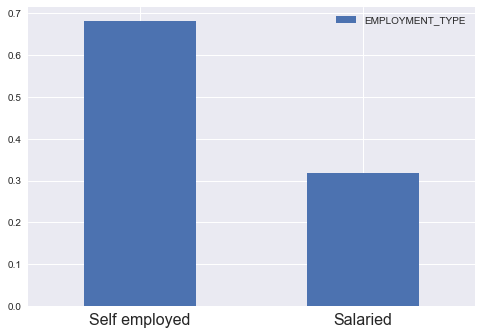

In [27]:
default_only['EMPLOYMENT_TYPE'].value_counts(normalize=True).to_frame().plot(kind='bar')
plt.xticks(rotation=0, size=16)
plt.show()

The portion of self employed applicants is significantly higher than that of employed applicants.

<AxesSubplot:ylabel='Frequency'>

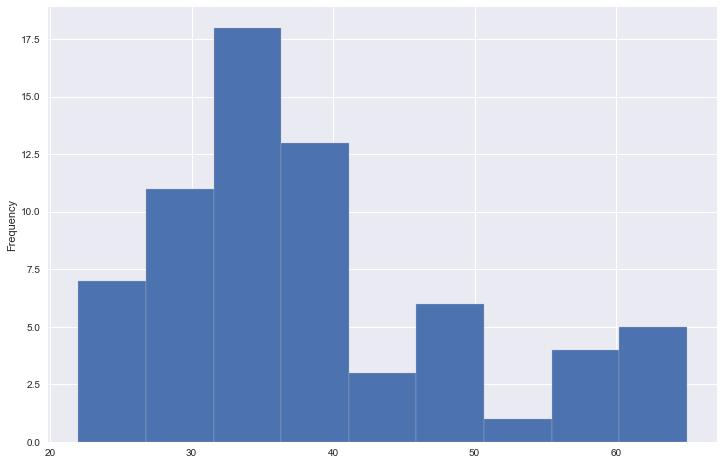

In [28]:
bins = np.linspace(default_only['AGE'].min(), default_only['AGE'].max(), 10)
default_only['AGE'].plot(kind='hist', figsize=(12,8), bins=bins, edgecolor='silver')

People in the 45-50, 55-60 and 60-65 age brackets seem to be represented disproportionately.
One explanation for the 60-65 bracket could be that some of those older applicants do not live long enough to repay their loans, hence the default.

The unusual distribution of age at these dealerships could also be explained by local demographics, which would need further analysis that is beyond the scope of this project.

<AxesSubplot:ylabel='Frequency'>

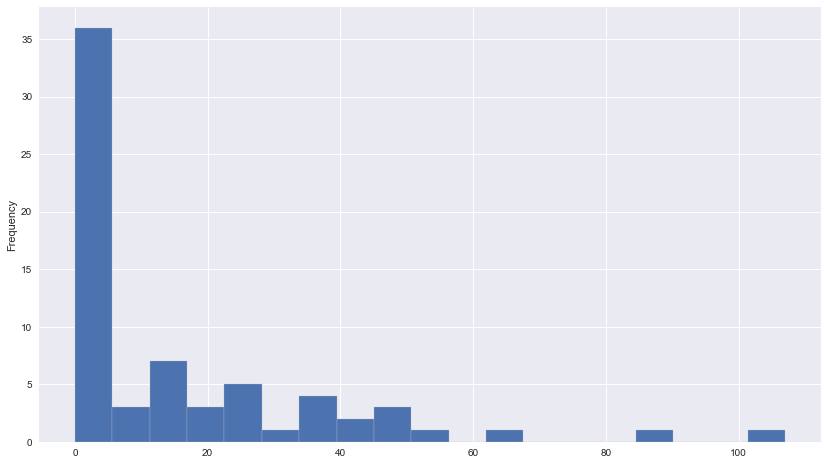

In [29]:
bins = np.linspace(default_only['CREDIT_HISTORY_LENGTH'].min(), default_only['CREDIT_HISTORY_LENGTH'].max(), 20)
default_only['CREDIT_HISTORY_LENGTH'].plot(kind='hist', figsize=(14,8), bins=bins, edgecolor='silver')

The distribution of the length of credit history shows no significant difference compared to the overall distribution:
+ applicants with no credit history are overrepresented
+ the minor differences that do exist could potentially be attributed to the unequal age distribution amongst these dealerships

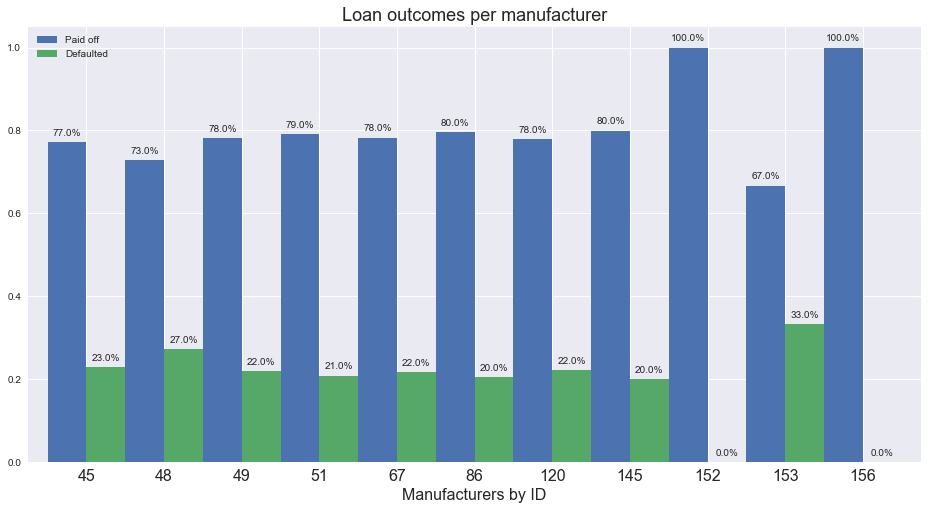

In [31]:
manufacturers = id_list.groupby(['MANUFACTURER_ID'])['LOAN_DEFAULT'].value_counts(normalize=True).to_frame()
splot = manufacturers.unstack(1)['LOAN_DEFAULT'].plot(kind='bar', figsize=(16,8), width=1)
for p in splot.patches:
    splot.annotate(format(round(p.get_height(), 2) * 100)+"%",
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
    
plt.xticks(rotation=0, size=16)
plt.xlabel('Manufacturers by ID', size=16)
labels = ['Paid off', 'Defaulted']
plt.legend(labels)
plt.title('Loan outcomes per manufacturer', size=18)
plt.show()

Buyers of brand 152 and 156 are not likely to default on their loans, all other brands show a similar default rate, with 153 being the only exception with a 33% default rate.

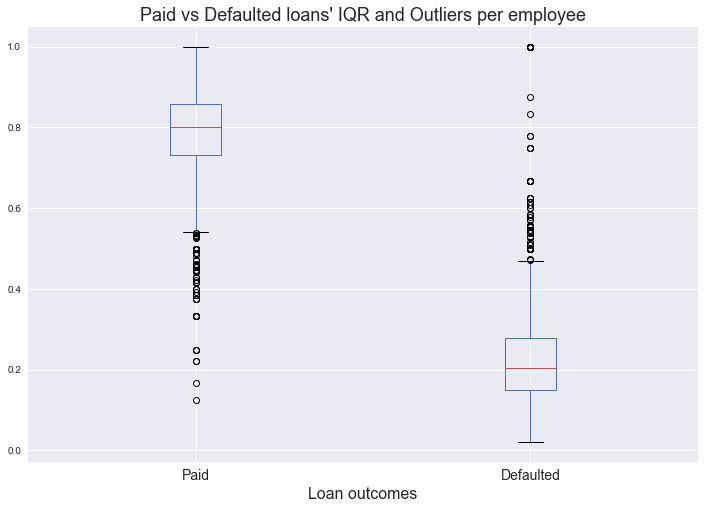

In [32]:
employees = id_list.groupby(['EMPLOYEE_CODE_ID'])['LOAN_DEFAULT'].value_counts(normalize=True).to_frame()
employees.unstack(1)['LOAN_DEFAULT'].plot(kind='box', figsize=(12,8))
tick_labels = ['Paid', 'Defaulted']
plt.xticks([1,2], tick_labels, size=14)
plt.xlabel('Loan outcomes', size=16)
plt.title('Paid vs Defaulted loans\' IQR and Outliers per employee', size=18)
plt.show()

In [33]:
filt_default_emp = employees.unstack(1)['LOAN_DEFAULT'][1] == 1
employee_ID_list =list(employees.unstack(1)['LOAN_DEFAULT'][1].loc[filt_default_emp].index)
len(employee_ID_list)

22

There are 22 employees with only applicants who default on their loan.

I will now compare their dealerships IDs with the IDs of those dealerships that have 100% default rate with their applicants to see if they match. 

In [34]:
filt = train['EMPLOYEE_CODE_ID'].isin(employee_ID_list)
default_emp = train.loc[filt]
defaulting_emp_and_dealer = pd.merge(default_only, default_emp, on='SUPPLIER_ID', how='inner')
defaulting_emp_and_dealer

,UNIQUEID_x,DISBURSED_AMOUNT_x,ASSET_COST_x,LTV_x,BRANCH_ID_x,SUPPLIER_ID,MANUFACTURER_ID_x,CURRENT_PINCODE_ID_x,DATE_OF_BIRTH_x,EMPLOYMENT_TYPE_x,...,PRIMARY_INSTAL_AMT_y,SEC_INSTAL_AMT_y,NEW_ACCTS_IN_LAST_SIX_MONTHS_y,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS_y,AVERAGE_ACCT_AGE_y,CREDIT_HISTORY_LENGTH_y,NO_OF_INQUIRIES_y,LOAN_DEFAULT_y,AGE_y,DAY_y
0,652808,61213,79618,77.87,66,16788,51,3155,1987-01-01,Self employed,...,7745,0,0,0,8,13,0,1,36,2
1,652808,61213,79618,77.87,66,16788,51,3155,1987-01-01,Self employed,...,0,0,0,0,0,0,0,1,41,4
2,626502,38439,49760,78.38,66,16788,51,3178,1982-01-01,Self employed,...,7745,0,0,0,8,13,0,1,36,2
3,626502,38439,49760,78.38,66,16788,51,3178,1982-01-01,Self employed,...,0,0,0,0,0,0,0,1,41,4


In [35]:
defaulting_emp_and_dealer['EMPLOYEE_CODE_ID_x']

0    3756
1    3756
2    3756
3    3756
Name: EMPLOYEE_CODE_ID_x, dtype: int64

In [36]:
train[train['EMPLOYEE_CODE_ID'] == 3756]

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,AGE,DAY
229764,652808,61213,79618,77.87,66,16788,51,3155,1987-01-01,Self employed,...,7745,0,0,0,8,13,0,1,36,2
229765,626502,38439,49760,78.38,66,16788,51,3178,1982-01-01,Self employed,...,0,0,0,0,0,0,0,1,41,4


The dealership under the ID 16788 has an employee that processed two applications for two customers who applied for a loan for the same brand of car and same amount, and provided different age, credit history each time.

Given the fact that the employee have only processed applications for only these two customers in total this unusual behaviour could be attributed to the lack of experience/training of the employee, rather than fraudulent behaviour.

In [44]:
default_emp.groupby('EMPLOYEE_CODE_ID')['LOAN_DEFAULT'].value_counts()

EMPLOYEE_CODE_ID  LOAN_DEFAULT
115               1               1
350               1               1
1046              1               3
1884              1               1
2463              1               1
3052              1               1
3101              1               1
3528              1               1
3581              1               2
3685              1               1
3714              1               2
3730              1               1
3741              1               2
3746              1               1
3756              1               2
3766              1               1
3771              1               1
3780              1               1
3783              1               1
3784              1               1
3793              1               1
3795              1               1
Name: LOAN_DEFAULT, dtype: int64

The rest of the employees with only applicants who defaulted show similar characteristics: they have 1 or 2 customers in total which does not indicated fraudulent behaviour

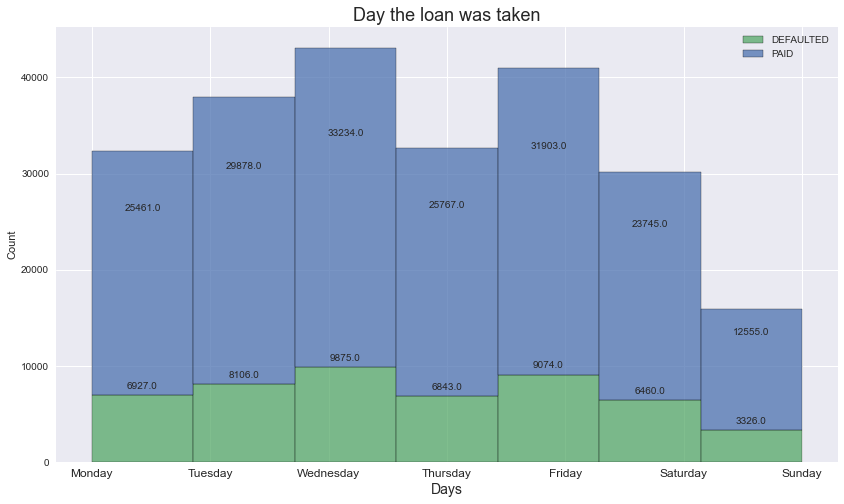

In [38]:
bins = np.linspace(train.DAY.min(), train.DAY.max(), 8)
plt.figure(figsize=(14,8))
splot = sns.histplot(train, x='DAY', hue='LOAN_DEFAULT',  bins=bins, multiple='stack')
for p in splot.patches:
    splot.annotate(format(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
labels = [ 'DEFAULTED', 'PAID']
plt.legend(labels)
tick_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks([0,1,2,3,4,5,6], tick_labels, size=12)
plt.title('Day the loan was taken', size=18)
plt.xlabel('Days', size=14)
plt.show()

There are no irreguralities in terms of default rates based on the day of the week the loan is taken.

This part of the analysis was only included because, based on previous experience, personal and quick loans' default rates are normally affected by the day the loan is taken.
In this case there seem to be no relation between them.

# Todo


+ ~**Check if there is any need for one hot encoding**~
+ ~**Check for missing data**~
+ ~**Do an overall correlation**~
+ **Choose variables**
+ **Build custom function for preparing both datasets**
+ **Prepare both datasets and save them as new files**

In [50]:
train.dtypes

UNIQUEID                                        int64
DISBURSED_AMOUNT                                int64
ASSET_COST                                      int64
LTV                                           float64
BRANCH_ID                                       int64
SUPPLIER_ID                                     int64
MANUFACTURER_ID                                 int64
CURRENT_PINCODE_ID                              int64
DATE_OF_BIRTH                          datetime64[ns]
EMPLOYMENT_TYPE                                object
DISBURSAL_DATE                         datetime64[ns]
STATE_ID                                        int64
EMPLOYEE_CODE_ID                                int64
MOBILENO_AVL_FLAG                               int64
AADHAR_FLAG                                     int64
PAN_FLAG                                        int64
VOTERID_FLAG                                    int64
DRIVING_FLAG                                    int64
PASSPORT_FLAG               

In [55]:
train = pd.concat([train, pd.get_dummies(train['EMPLOYMENT_TYPE'])], axis=1)
del train['EMPLOYMENT_TYPE']

In [56]:
train.isna().sum()

UNIQUEID                               0
DISBURSED_AMOUNT                       0
ASSET_COST                             0
LTV                                    0
BRANCH_ID                              0
SUPPLIER_ID                            0
MANUFACTURER_ID                        0
CURRENT_PINCODE_ID                     0
DATE_OF_BIRTH                          0
DISBURSAL_DATE                         0
STATE_ID                               0
EMPLOYEE_CODE_ID                       0
MOBILENO_AVL_FLAG                      0
AADHAR_FLAG                            0
PAN_FLAG                               0
VOTERID_FLAG                           0
DRIVING_FLAG                           0
PASSPORT_FLAG                          0
PERFORM_CNS_SCORE                      0
PERFORM_CNS_SCORE_DESCRIPTION          0
PRI_NO_OF_ACCTS                        0
PRI_ACTIVE_ACCTS                       0
PRI_OVERDUE_ACCTS                      0
PRI_CURRENT_BALANCE                    0
PRI_SANCTIONED_A

In [63]:
train.corrwith(train['LOAN_DEFAULT'])

UNIQUEID                               0.033848
DISBURSED_AMOUNT                       0.077675
ASSET_COST                             0.014261
LTV                                    0.098208
BRANCH_ID                              0.030193
SUPPLIER_ID                            0.027357
MANUFACTURER_ID                       -0.025039
CURRENT_PINCODE_ID                     0.028419
STATE_ID                               0.048075
EMPLOYEE_CODE_ID                       0.020657
MOBILENO_AVL_FLAG                           NaN
AADHAR_FLAG                           -0.041593
PAN_FLAG                               0.002046
VOTERID_FLAG                           0.043747
DRIVING_FLAG                          -0.005821
PASSPORT_FLAG                         -0.007602
PERFORM_CNS_SCORE                     -0.057929
PRI_NO_OF_ACCTS                       -0.035456
PRI_ACTIVE_ACCTS                      -0.041451
PRI_OVERDUE_ACCTS                      0.040872
PRI_CURRENT_BALANCE                   -0

In [61]:
train['MOBILENO_AVL_FLAG'].value_counts()

1    233154
Name: MOBILENO_AVL_FLAG, dtype: int64

# Feature selection

Based on the above analysis, the correlation table above and formatting reasons I will drop the following columns from the dataset:

+ SEC_INSTAL_AMT 
+ SEC_OVERDUE_ACCTS
+ SEC_NO_OF_ACCTS 
+ SEC_ACTIVE_ACCTS
+ MOBILENO_AVL_FLAG
+ DISBURSAL_DATE
+ DATE_OF_BIRTH
+ EMPLOYMENT_TYPE
+ PERFORM_CNS_SCORE_DESCRIPTION *(this is deleted as this column is likely to be based on another model by the provider)*

***

### Due to the source data having previously been split to train and test I will create a factory function that formats both datasets to the same standards

In [57]:
def factory(df, name):
    df['AVERAGE_ACCT_AGE'] = convert(df, 'AVERAGE_ACCT_AGE')
    df['CREDIT_HISTORY_LENGTH'] = convert(df, 'CREDIT_HISTORY_LENGTH')
    df['DATE_OF_BIRTH'] = pd.to_datetime(df['DATE_OF_BIRTH'], format='%d-%m-%Y')
    now = dt.now()
    df['AGE'] = [round((now - x).days / 352) for x in df['DATE_OF_BIRTH']]
    df = pd.concat([df, pd.get_dummies(df['EMPLOYMENT_TYPE'])], axis=1)
    df.drop(columns=['CURRENT_PINCODE_ID', 'UNIQUEID', 'SEC_INSTAL_AMT', 'SEC_OVERDUE_ACCTS', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'MOBILENO_AVL_FLAG', 'DISBURSAL_DATE', 'DATE_OF_BIRTH', 'EMPLOYMENT_TYPE', 'PERFORM_CNS_SCORE_DESCRIPTION'], axis=1, inplace=True)
    df.to_csv(f'{name}.csv')
    
    return df

In [58]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [59]:
factory(train, 'train_new')

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,STATE_ID,EMPLOYEE_CODE_ID,AADHAR_FLAG,PAN_FLAG,...,PRIMARY_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,AGE,Salaried,Self employed
0,50578,58400,89.55,67,22807,45,6,1998,1,0,...,0,0,0,0,0,0,0,39,1,0
1,47145,65550,73.23,67,22807,45,6,1998,1,0,...,1991,0,1,23,23,0,1,37,0,1
2,53278,61360,89.63,67,22807,45,6,1998,1,0,...,0,0,0,0,0,0,0,37,0,1
3,57513,66113,88.48,67,22807,45,6,1998,1,0,...,31,0,0,8,15,1,1,28,0,1
4,52378,60300,88.39,67,22807,45,6,1998,1,0,...,0,0,0,0,0,1,1,45,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,63213,105405,60.72,34,20700,48,6,3705,0,0,...,4084,0,0,21,39,0,0,34,1,0
233150,73651,100600,74.95,34,23775,51,6,3705,0,0,...,1565,0,0,6,6,0,0,34,0,1
233151,33484,71212,48.45,77,22186,86,4,3479,1,0,...,0,0,0,0,0,0,0,47,1,0
233152,34259,73286,49.10,77,22186,86,4,3479,1,0,...,0,0,0,0,0,0,0,28,1,0


In [60]:
factory(test, 'test_new')

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,STATE_ID,EMPLOYEE_CODE_ID,AADHAR_FLAG,PAN_FLAG,...,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,AGE,Salaried,Self employed
0,53478,63558,86.54,67,22807,45,6,1998,1,0,...,0,0,0,0,0,0,0,49,1,0
1,55513,63163,89.45,67,22807,45,6,1998,1,0,...,0,5605,1,0,8,12,1,37,0,1
2,65282,84320,79.93,78,23135,86,4,1646,1,1,...,0,0,0,0,0,0,0,26,1,0
3,46905,63896,76.58,78,17014,45,4,1646,1,0,...,0,0,0,0,29,29,0,50,0,1
4,51428,63896,86.08,78,17014,45,4,1646,1,0,...,0,0,0,0,0,0,0,51,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112387,44875,72509,67.58,74,16646,86,4,3823,1,0,...,0,0,0,0,0,0,0,30,0,1
112388,53549,72509,78.61,74,16646,86,4,3823,1,0,...,0,0,0,0,0,0,0,38,0,1
112389,55243,72509,81.37,74,16646,86,4,3823,1,0,...,0,0,0,0,58,113,0,37,0,1
112390,55243,72509,81.37,74,16646,86,4,3823,1,0,...,0,0,1,1,3,3,0,50,0,1
